In [1]:

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import color, data, restoration

Text(0.5, 1.0, 'Original Image')

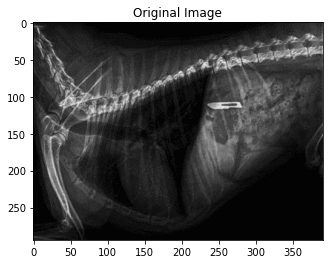

In [2]:
image = cv2.imread('orig.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image,  cmap='gray')
plt.title('Original Image')

In [3]:
gray_image.dtype

dtype('uint8')

In [4]:
img = np.float64(gray_image)

Text(0.5, 1.0, 'Gaussian Blur Image')

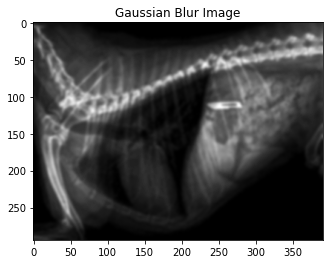

In [5]:
blur = cv2.GaussianBlur(img,(9,9),0)
plt.imshow(blur,  cmap='gray')
plt.title('Gaussian Blur Image')

Text(0.5, 1.0, 'Laplacian Image')

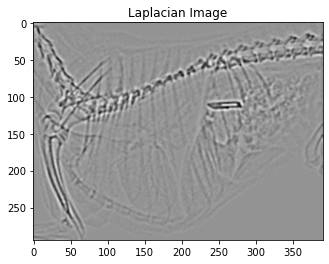

In [6]:
laplacian = cv2.Laplacian(blur,cv2.CV_64F,3)
plt.imshow(laplacian,  cmap='gray')
plt.title('Laplacian Image')

Text(0.5, 1.0, 'Original Image + Laplacian Image')

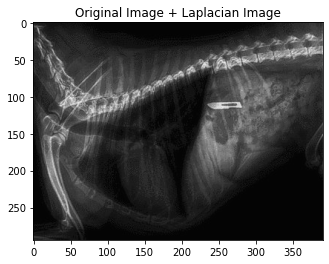

In [7]:
added_img = cv2.add(img,laplacian)
plt.imshow(added_img,  cmap='gray')
plt.title('Original Image + Laplacian Image')

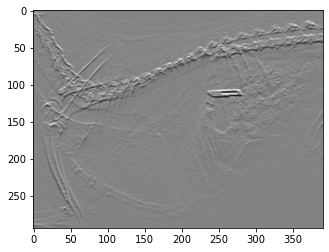

In [8]:
#sobel operator
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  # x
plt.imshow(sobelx,  cmap='gray')
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)  # y
plt.imshow(sobely,  cmap='gray')

Text(0.5, 1.0, 'Sobel Filter Gradient Image')

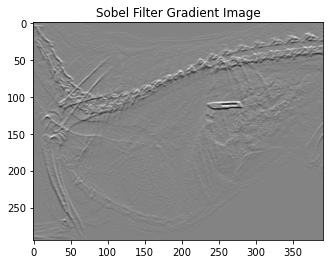

In [9]:
mag = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobely,  cmap='gray')
plt.title('Sobel Filter Gradient Image')

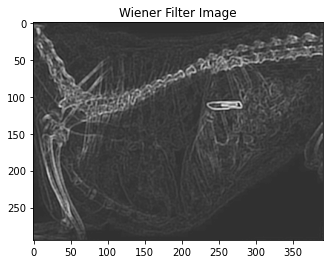

In [21]:
from scipy.signal.signaltools import wiener
psf = np.ones((3,3)) / 9
deconvolved = restoration.wiener(mag, psf, 0.05, clip=False)
plt.imshow(deconvolved, cmap='gray')
plt.title('Wiener Filter Image')
plt.show()


Text(0.5, 1.0, 'Product of Sharpened Image and Smoothed Filter Image')

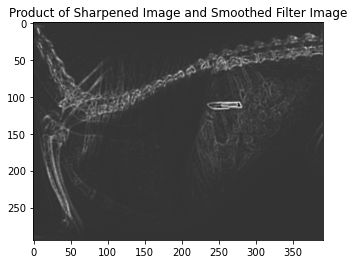

In [11]:
prod_img = cv2.multiply(deconvolved,added_img)
plt.imshow(prod_img,  cmap='gray')
plt.title('Product of Sharpened Image and Smoothed Filter Image')

Text(0.5, 1.0, 'Product Image + Sharpened Laplacian Image')

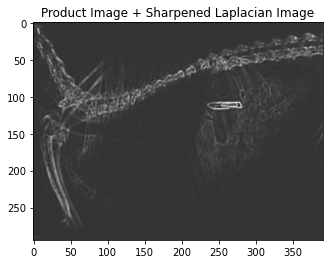

In [12]:
add2_img = cv2.add(prod_img,added_img)
plt.imshow(add2_img,  cmap='gray')
plt.title('Product Image + Sharpened Laplacian Image')

(294, 391, 3)

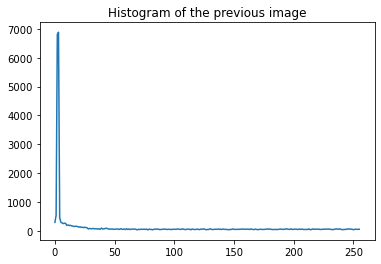

In [18]:
hist,bins = np.histogram(add2_img,256,[0,256])

plt.plot(hist)
plt.title('Histogram of the previous image')
image.shape

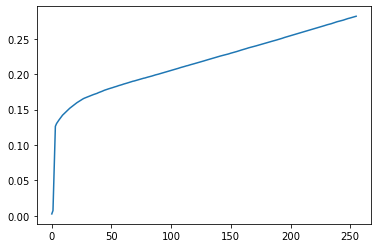

In [14]:
prob = np.zeros((256, 1), np.float32)

for j in range(0, 256):
    prob[j,0] = hist[j] / (294*391)



cdf = prob.cumsum()


plt.plot(cdf)

In [15]:
equ_image = cv2.equalizeHist(gray_image)

Text(0.5, 1.0, 'Histogram Equalization')

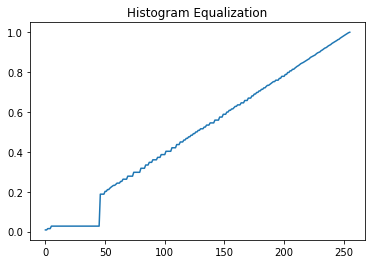

In [19]:
hist2,bins2 = np.histogram(equ_image,256,[0,256])
prob = np.zeros((256, 1), np.float32)

for j in range(0, 256):
    prob[j,0] = hist2[j] / (294*391)


 

cdf = prob.cumsum()

plt.plot(cdf)
plt.title('Histogram Equalization')

Text(0.5, 1.0, 'After Histogram Equalization')

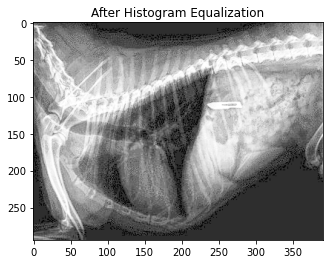

In [17]:
plt.imshow(equ_image, cmap='gray')
plt.title('After Histogram Equalization')